In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 100
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

Here, we have read, filtered, and adjusted the suicide rate dataset to construct a series of year and suicides rates.

In [3]:
suicide_file = 'Death_rates_for_suicide_by_sex_race_age_United_States.csv'
suicide = pd.read_csv(suicide_file, index_col=['YEAR'])
suicide = suicide[suicide['STUB_LABEL'] == 'All persons']
suicide = suicide[suicide['UNIT'] == 'Deaths per 100,000 resident population, age-adjusted']
suicide = suicide.loc['1980':]
suicide = suicide['ESTIMATE']
suicide

YEAR
1980    12.2
1981    12.3
1982    12.5
1983    12.4
1984    12.6
1985    12.5
1986    13.0
1987    12.8
1988    12.5
1989    12.3
1990    12.5
1991    12.3
1992    12.0
1993    12.1
1994    11.9
1995    11.8
1996    11.5
1997    11.2
1998    11.1
1999    10.5
2000    10.4
2001    10.7
2002    10.9
2003    10.8
2004    11.0
2005    10.9
2006    11.0
2007    11.3
2008    11.6
2009    11.8
2010    12.1
2011    12.3
2012    12.6
2013    12.6
2014    13.0
2015    13.3
2016    13.5
2017    14.0
2018    14.2
Name: ESTIMATE, dtype: float64

Here, we have read, filtered, and adjusted the unemployment rate dataset to construct a series of year and unemployment rates.

In [5]:
unemp_file = 'EPI Data Library - Unemployment.csv'
unemployment = pd.read_csv(unemp_file, index_col=['Date'])
unemployment.index = pd.to_datetime(unemployment.index, format='%b-%Y').year
unemployment = unemployment.sort_index(ascending=True)
unemployment = unemployment.loc[(2019 > unemployment.index) & (1979 < unemployment.index)]
unemployment['All'] = unemployment['All'].str.replace('%', '').astype(float)
unemployment = unemployment.groupby(unemployment.index)['All'].mean()
unemployment

Date
1980     6.533333
1981     7.550000
1982     8.691667
1983    10.083333
1984     8.358333
1985     7.308333
1986     7.058333
1987     6.625000
1988     5.766667
1989     5.341667
1990     5.383333
1991     6.333333
1992     7.283333
1993     7.266667
1994     6.491667
1995     5.750000
1996     5.591667
1997     5.225000
1998     4.683333
1999     4.350000
2000     4.091667
2001     4.250000
2002     5.450000
2003     5.908333
2004     5.750000
2005     5.291667
2006     4.816667
2007     4.558333
2008     5.083333
2009     7.716667
2010     9.658333
2011     9.250000
2012     8.475000
2013     7.725000
2014     6.750000
2015     5.650000
2016     5.008333
2017     4.625000
2018     4.091667
Name: All, dtype: float64

Here, we have visualized both datasets by plotting them to examine whether or not there is a correlation between suicide and unemployment.

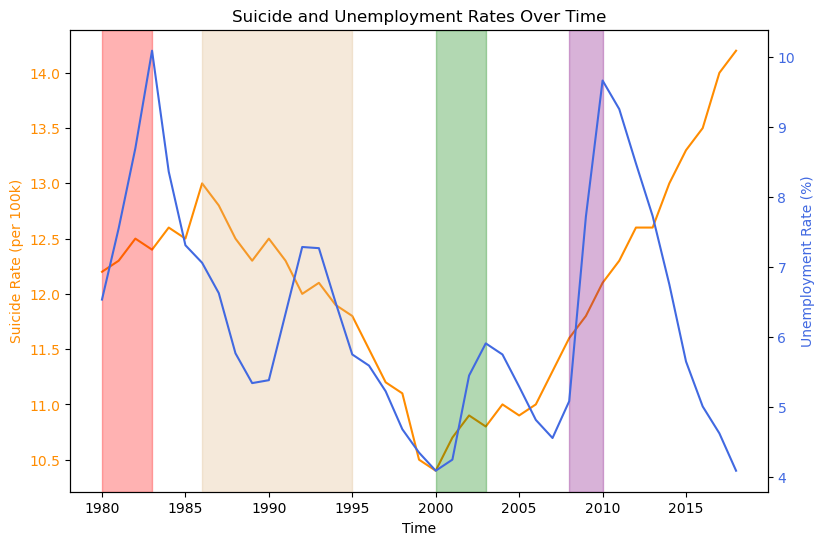

In [7]:
fig, sui = plt.subplots(figsize=(9, 6))
unemp = sui.twinx()

color = 'darkorange'
sui.set_xlabel('Time')
sui.set_ylabel('Suicide Rate (per 100k)', color=color)
sui.plot(suicide, label='Suicide Rate', color=color)
sui.tick_params(axis='y', labelcolor=color)

color = 'royalblue'
unemp.set_ylabel('Unemployment Rate (%)', color=color)
unemp.plot(unemployment, label='Unemployment Rate', color=color)
unemp.tick_params(axis='y', labelcolor=color)

plt.axvspan(1980, 1983, color='red', alpha=0.3, label='Early 1980s Recession')
plt.axvspan(1986, 1995, color='burlywood', alpha=0.3, label='Savings and Loan Crisis')
plt.axvspan(2000, 2003, color='green', alpha=0.3, label='Dot-com Bubble')
plt.axvspan(2008, 2010, color='purple', alpha=0.3, label='2008 Global Financial Crisis')


plt.title('Suicide and Unemployment Rates Over Time')
plt.show()